# Regression Analysis

### This Script Contains the Following Points:
#### 1. Importing Libraries & Data
#### 2. Cleaning Data
#### 3. Exploring Data Visually to find Relationships of Variables to Test
#### 4. Hypothesis 
#### 5. Preparing Data for Regression
#### 6. Conducting Regression Analysis

## 1. Importing Libraries & Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [10]:
# Creating folder path to dataset 

path = r'/Users/C SaiVishwanath/Desktop/2024 Projects/Netflix/02 Data'

In [12]:
# Imporing the Netflix data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'netflix_updated_country.csv'))

## 2. Cleaning Data

In [15]:
df.columns

Index(['Unnamed: 0', 'User ID', 'Subscription Type', 'Monthly Revenue',
       'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Days Since Join', 'Region', 'Total Months', 'Total Revenue'],
      dtype='object')

In [17]:
df.head(10)

,Unnamed: 0,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Days Since Join,Region,Total Months,Total Revenue
0,0,1,Basic,10.0,1/15/22,10/6/23,United States of America,28,Male,Smartphone,629,United States and Canada,21.0,209.67
1,1,2,Premium,15.0,5/9/21,6/22/23,Canada,35,Female,Tablet,774,United States and Canada,25.8,387.00
2,2,3,Standard,12.0,2/28/23,6/27/23,United Kingdom,42,Male,Smart TV,119,Europe,4.0,47.60
3,3,4,Standard,12.0,10/7/22,6/26/23,Australia,51,Female,Laptop,262,Asia-Pacific,8.7,104.80
4,4,5,Basic,10.0,1/5/23,6/28/23,Germany,33,Male,Smartphone,174,Europe,5.8,58.00
5,5,6,Premium,15.0,3/18/22,6/27/23,France,29,Female,Smart TV,466,Europe,15.5,233.00
6,6,7,Standard,12.0,9/12/21,6/25/23,Brazil,46,Male,Tablet,651,Latin America,21.7,260.40
7,7,8,Basic,10.0,2/4/23,6/24/23,Mexico,39,Female,Laptop,140,Latin America,4.7,46.67
8,8,9,Standard,12.0,10/20/22,6/23/23,Spain,37,Male,Smartphone,246,Europe,8.2,98.40
9,9,10,Premium,15.0,1/7/23,6/22/23,Italy,44,Female,Smart TV,166,Europe,5.5,83.00


In [19]:
df.shape

(2500, 14)

In [21]:
# Dropping 'Unnamed: 0' column

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [23]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Days Since Join,Region,Total Months,Total Revenue
0,1,Basic,10.0,1/15/22,10/6/23,United States of America,28,Male,Smartphone,629,United States and Canada,21.0,209.67
1,2,Premium,15.0,5/9/21,6/22/23,Canada,35,Female,Tablet,774,United States and Canada,25.8,387.00
2,3,Standard,12.0,2/28/23,6/27/23,United Kingdom,42,Male,Smart TV,119,Europe,4.0,47.60
3,4,Standard,12.0,10/7/22,6/26/23,Australia,51,Female,Laptop,262,Asia-Pacific,8.7,104.80
4,5,Basic,10.0,1/5/23,6/28/23,Germany,33,Male,Smartphone,174,Europe,5.8,58.00


In [25]:
# Checking for missing values

df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Days Since Join      0
Region               0
Total Months         0
Total Revenue        0
dtype: int64

In [27]:
# No missing values to handle

In [29]:
# Checking for duplicates

dups=df.duplicated()

In [31]:
dups.shape

(2500,)

In [33]:
# No Duplicates to handle

In [50]:
# Renaming 'Monthly Revenue' column to 'Monthly Fee' for clarity. This is the amount the user pays per month for the subscription

df.rename(columns={'Monthly Revenue': 'Monthly Fee'}, inplace=True)

In [52]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Fee', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Days Since Join', 'Region', 'Total Months', 'Total Revenue'],
      dtype='object')

In [54]:
#Exporting updated df

df.to_csv(os.path.join(path, 'Prepared Data', 'netflix_regression_data.csv'))

## 3. Exploring Data Visually to find Relationships of Variables to Test

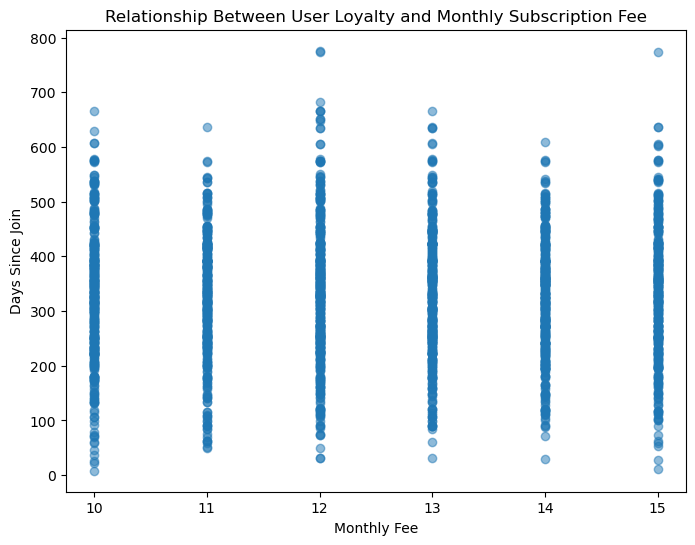

In [56]:
# Creating scatterplot of 'Days Since Join' column and 'Monthly Fee'
# Looking to see if there may be a linear relationship between how much the user pays per month and user loyalty

plt.figure(figsize=(8, 6))
plt.scatter(df['Monthly Fee'], df['Days Since Join'], alpha=0.5)

# Add labels and title
plt.title('Relationship Between User Loyalty and Monthly Subscription Fee')
plt.xlabel('Monthly Fee')
plt.ylabel('Days Since Join')

# Show the plot
plt.show()


In [64]:
# There appears to be no linear relationship between the amount a user pays per month and their loyalty (the length of their subscription)

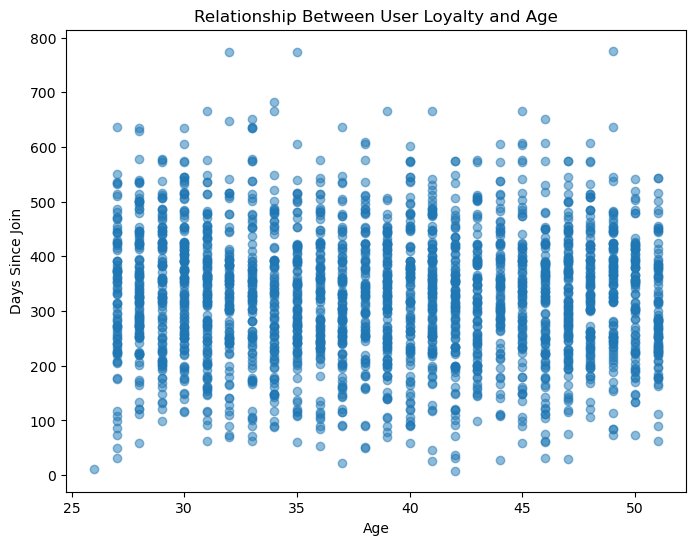

In [66]:
# Creating scatterplot of 'Days Since Join' column and 'Age'
# Looking to see if there may be a linear relationship between user loyalty and age

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Days Since Join'], alpha=0.5)

# Add labels and title
plt.title('Relationship Between User Loyalty and Age')
plt.xlabel('Age')
plt.ylabel('Days Since Join')

# Show the plot
plt.show()


In [68]:
# There appears to be no linear relationship between age and user loyalty

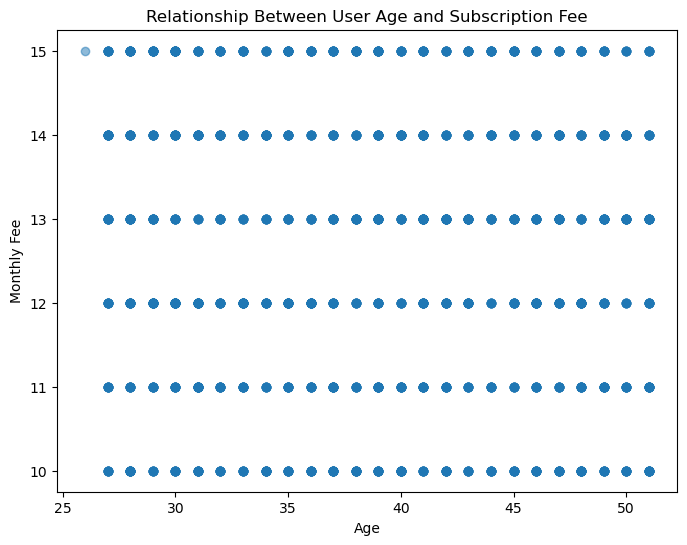

In [70]:
# Creating scatterplot of 'Monthly Fee' column and 'Age'
# Looking to see if there may be a linear relationship between user age and the amount they pay for their monthly subscription

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Monthly Fee'], alpha=0.5)

# Add labels and title
plt.title('Relationship Between User Age and Subscription Fee')
plt.xlabel('Age')
plt.ylabel('Monthly Fee')

# Show the plot
plt.show()


In [72]:
# There appears to be no linear relationship

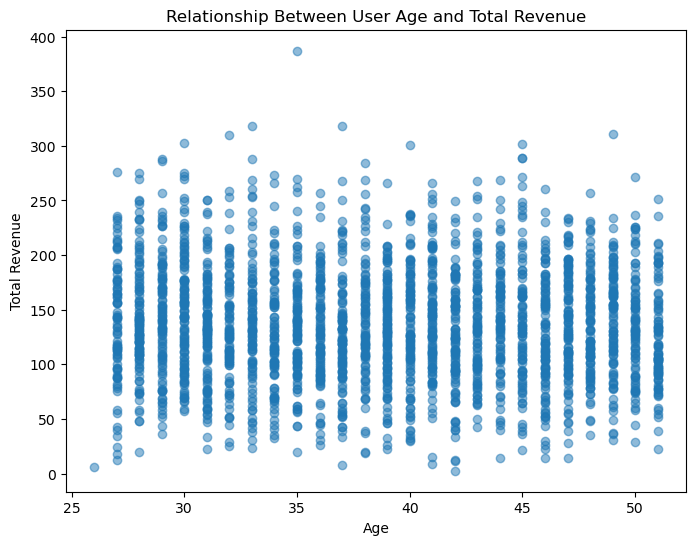

In [74]:
# Creating scatterplot of 'Total Revenue' column and 'Age'
# Looking to see if there may be a linear relationship between user age and how much they'd spent over the entirity of their subscription

plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Total Revenue'], alpha=0.5)

# Add labels and title
plt.title('Relationship Between User Age and Total Revenue')
plt.xlabel('Age')
plt.ylabel('Total Revenue')

# Show the plot
plt.show()


In [76]:
# There appears to be no relationship

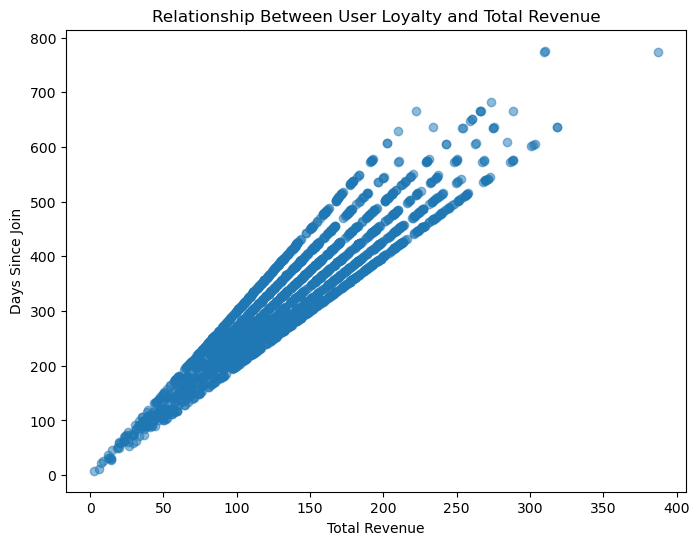

In [78]:
# Looking to see if there may be a linear relationship between user loyalty and total revenue

plt.figure(figsize=(8, 6))
plt.scatter(df['Total Revenue'], df['Days Since Join'], alpha=0.5)

# Add labels and title
plt.title('Relationship Between User Loyalty and Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Days Since Join')

# Show the plot
plt.show()

In [80]:
# There appears to be a relatively strong positive linear relationship between 'Days Since Join' and 'Total Revenue'

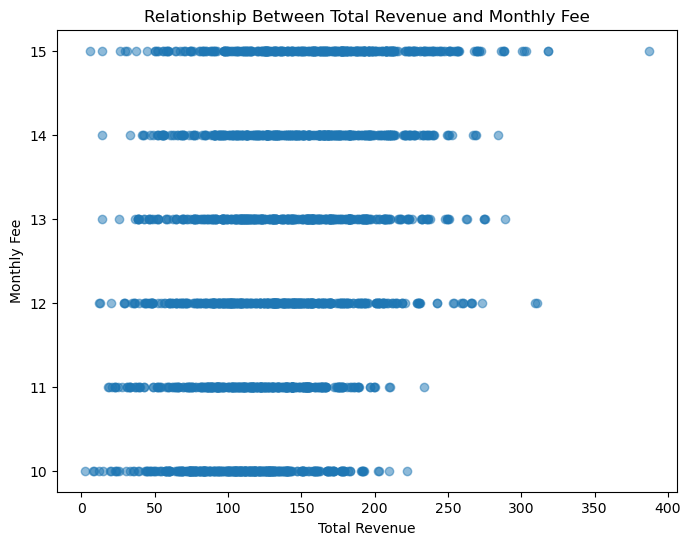

In [82]:

# Looking to see if there may be a linear relationship between total revenue and monthly fee

plt.figure(figsize=(8, 6))
plt.scatter(df['Total Revenue'], df['Monthly Fee'], alpha=0.5)

# Add labels and title
plt.title('Relationship Between Total Revenue and Monthly Fee')
plt.xlabel('Total Revenue')
plt.ylabel('Monthly Fee')

# Show the plot
plt.show()


In [84]:
# There appears to be no linear relationship

## 4. Hypothesis

**Hypothesis:** Users who generate higher total revenue tend to have been subscribers for a longer period.

## 5. Preparing Data for Regression

In [101]:
# Summarizing data

In [97]:
df['Total Revenue'].describe()

count    2500.000000
mean      136.507032
std        51.912581
min         2.670000
25%       101.150000
50%       132.600000
75%       169.870000
max       387.000000
Name: Total Revenue, dtype: float64

In [99]:
df['Days Since Join'].describe()

count    2500.000000
mean      327.393200
std       115.818714
min         8.000000
25%       249.000000
50%       330.000000
75%       402.000000
max       776.000000
Name: Days Since Join, dtype: float64

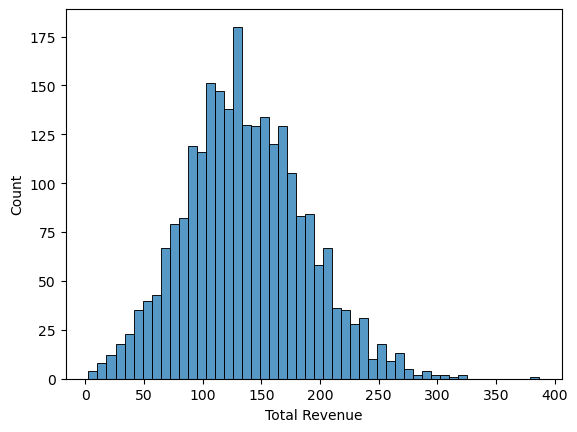

In [105]:
# Checking for extremes

sns.histplot(df['Total Revenue'], bins=50)

# Show the plot
plt.show()

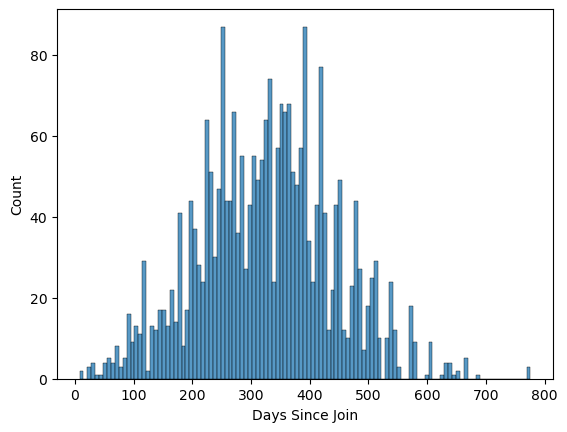

In [107]:
# Checking for extremes

sns.histplot(df['Days Since Join'], bins=115)

# Show the plot
plt.show()

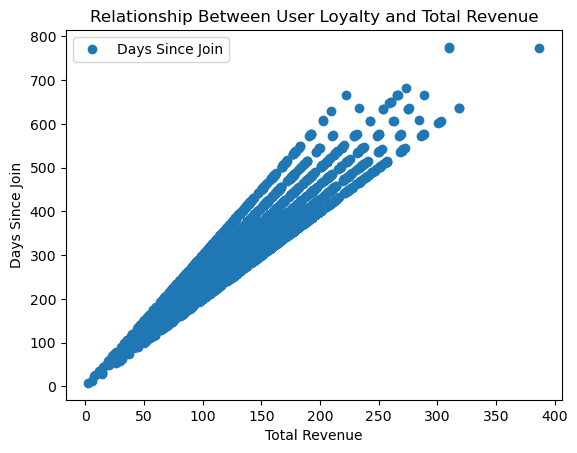

In [109]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total Revenue', y='Days Since Join',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Relationship Between User Loyalty and Total Revenue')  
plt.xlabel('Total Revenue')  
plt.ylabel('Days Since Join')  
plt.show()

In [111]:
# Reshaping the variables into NumPy arrays and put them into separate objects.

X = df['Total Revenue'].values.reshape(-1,1)
y = df['Days Since Join'].values.reshape(-1,1)

In [115]:
X

array([[209.67],
       [387.  ],
       [ 47.6 ],
       ...,
       [124.  ],
       [157.73],
       [240.5 ]])

In [117]:
y

array([[629],
       [774],
       [119],
       ...,
       [310],
       [364],
       [481]])

In [119]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 6. Conduction Regression Analysis

In [122]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [124]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [126]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

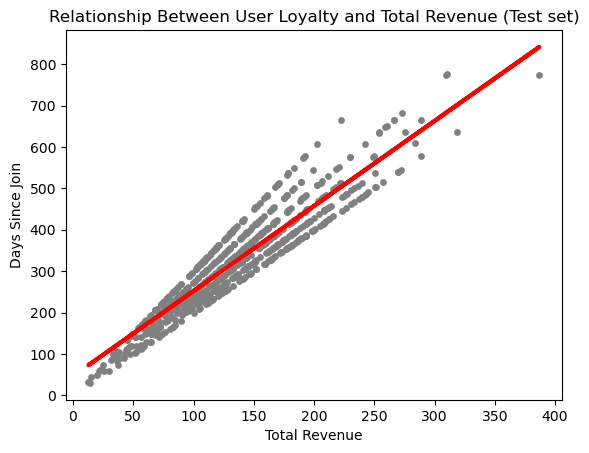

In [128]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Relationship Between User Loyalty and Total Revenue (Test set)')
plot_test.xlabel('Total Revenue')
plot_test.ylabel('Days Since Join')
plot_test.show()

In [130]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [132]:
# Printing the model summary statistics in order to evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.05403313]]
Mean squared error:  1940.5315010802528
R2 score:  0.8674525466703111


In [134]:
variance = df['Total Revenue'].var()

# Print the variance
print("Variance of Total Revenue:", variance)

Variance of Total Revenue: 2694.9160584143406


**Notes:**
- The slope indicates a positive relationship between the independent and dependent variables.
- The mean squared error is small compared to the variance, which means the model captures the majority of the patterns in the data and reduces prediction error compared to a baseline model.
- R² score has a high value (0.867) suggesting that the model explains a large portion of the variance, meaning the fit is strong.

In [137]:
y_predicted

array([[343.22024955],
       [421.41729092],
       [404.16341261],
       [414.28979595],
       [346.50670256],
       [269.13127444],
       [278.72360917],
       [145.21145552],
       [612.70939661],
       [134.73588654],
       [230.80301617],
       [169.85985312],
       [362.11735437],
       [192.86502421],
       [196.56228385],
       [377.31719956],
       [430.72206102],
       [394.9818845 ],
       [110.64207789],
       [356.22227928],
       [292.89643779],
       [519.04548574],
       [256.1292447 ],
       [335.00411701],
       [381.15824151],
       [372.79832666],
       [243.18883597],
       [263.31836067],
       [305.63144321],
       [468.92707729],
       [362.58978199],
       [367.86864714],
       [417.78165228],
       [419.42487878],
       [227.37278084],
       [359.18008699],
       [323.64531379],
       [445.36731725],
       [366.69784826],
       [300.6401427 ],
       [298.91475487],
       [269.13127444],
       [422.23890418],
       [250

In [139]:
# Creating a dataframe to compare the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,361,343.220250
1,391,421.417291
2,373,404.163413
3,358,414.289796
4,292,346.506703
5,325,269.131274
6,226,278.723609
7,120,145.211456
8,636,612.709397
9,99,134.735887


In [141]:
# Comparing how the regression fits the training set

y_predicted_train = regression.predict(X_train) 

In [143]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [145]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.05403313]]
Mean squared error:  1873.046368698669
R2 score:  0.854582026866794


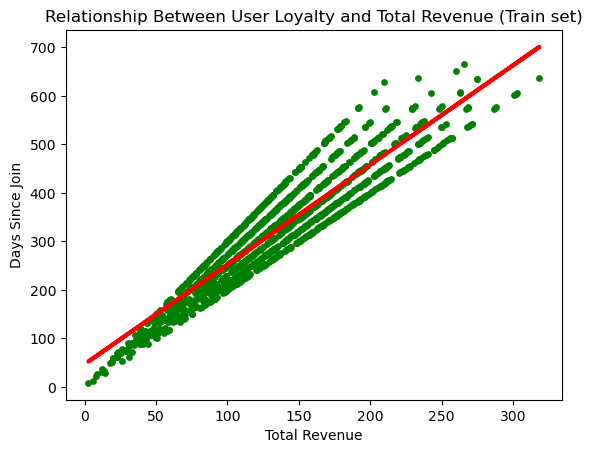

In [147]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Relationship Between User Loyalty and Total Revenue (Train set)')
plot_test.xlabel('Total Revenue')
plot_test.ylabel('Days Since Join')
plot_test.show()

**Notes:**
- Slope: The independent variable has a positive effect on the dependent variable. The relationship is meaningful, with each unit increase in the independent variable resulting in a 2.05 unit increase in the dependent variable.
- Mean Squared Error: still low, suggesting that the model is making relatively accurate predictions. 
- R squared score: the score of 0.8546 means the model explains a significant portion (85.5%) of the variance in the dependent variable, indicating a strong fit.